<a href="https://colab.research.google.com/github/npr99/PlanningMethods/blob/master/PLAN604_Census_API_Geography_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python packages required to read in and Census API data
import requests ## Required for the Census API
import pandas as pd # For reading, writing and wrangling data

For more information on Census API:
*   [Census Data API User Guide](https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf)
*   [List of available Census APIs](https://www.census.gov/data/developers/data-sets/decennial-census.2010.html)
*   [A list of variables available just from the 2010 short form](https://api.census.gov/data/2010/dec/sf1/variables.html)
*   [A list of State FIPS codes](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696)


In [ ]:
apijson = requests.get('https://api.census.gov/data/2010/dec/sf1',
                       params={'get': 'H001001,P001001,GEO_ID,NAME',
                               'for': 'state:*'})
# Convert the requested json into pandas dataframe
states = pd.DataFrame(columns=apijson.json()[0], data=apijson.json()[1:])
states.head()

,H001001,P001001,GEO_ID,NAME,state
0,2171853,4779736,0400000US01,Alabama,01
1,306967,710231,0400000US02,Alaska,02
2,2844526,6392017,0400000US04,Arizona,04
3,1316299,2915918,0400000US05,Arkansas,05
4,13680081,37253956,0400000US06,California,06


In [ ]:
apijson = requests.get('https://api.census.gov/data/2010/dec/sf1?get=H001001,NAME&for=county:*')
counties = pd.DataFrame(columns=apijson.json()[0], data=apijson.json()[1:])
counties.head()

,H001001,NAME,state,county
0,54651,"Sebastian County, Arkansas",05,131
1,6887,"Sevier County, Arkansas",05,133
2,9822,"Sharp County, Arkansas",05,135
3,6712,"Stone County, Arkansas",05,137
4,19653,"Union County, Arkansas",05,139


In [ ]:
apijson = requests.get('https://api.census.gov/data/2010/acs/acs5?get=NAME,B01001_001E,B01001_001M,B00001_001E&for=tract:*&in=state:48')
acstest = pd.DataFrame(columns=apijson.json()[0], data=apijson.json()[1:])
acstest.head()

,NAME,B01001_001E,B01001_001M,B00001_001E,state,county,tract
0,"Census Tract 9501, Anderson County, Texas",5216,685,543,48,001,950100
1,"Census Tract 9504.01, Anderson County, Texas",8089,660,780,48,001,950401
2,"Census Tract 9504.02, Anderson County, Texas",3755,977,215,48,001,950402
3,"Census Tract 9505, Anderson County, Texas",4576,770,304,48,001,950500
4,"Census Tract 9506, Anderson County, Texas",6114,650,373,48,001,950600


In [ ]:
acstest['B00001_001E'].describe()

count     5256
unique     700
top          0
freq        41
Name: B00001_001E, dtype: object

In [ ]:
import numpy as np

acstest['B01001_001E'] = acstest['B01001_001E'].astype(int)
acstest['B01001_001M'] = acstest['B01001_001M'].astype(int)
acstest['B00001_001E'] = acstest['B00001_001E'].fillna("0").astype(int)
acstest.head()

,NAME,B01001_001E,B01001_001M,B00001_001E,state,county,tract
0,"Census Tract 9501, Anderson County, Texas",5216,685,543,48,001,950100
1,"Census Tract 9504.01, Anderson County, Texas",8089,660,780,48,001,950401
2,"Census Tract 9504.02, Anderson County, Texas",3755,977,215,48,001,950402
3,"Census Tract 9505, Anderson County, Texas",4576,770,304,48,001,950500
4,"Census Tract 9506, Anderson County, Texas",6114,650,373,48,001,950600


https://www.census.gov/data/developers/data-sets/acs-1year/notes-on-acs-estimate-and-annotation-values.html

In [ ]:
acstest.loc[acstest['B01001_001M']<0, 'B01001_001M'] = np.nan

In [ ]:
acstest['B01001_001 Standard Error'] = acstest['B01001_001M'] / 1.645
acstest['B01001_001 Coefficient of Variation'] = acstest['B01001_001 Standard Error']/ acstest['B01001_001E'] * 100
acstest.loc[acstest['B01001_001E']==0, 'B01001_001 Coefficient of Variation'] = np.nan
acstest.head()

,NAME,B01001_001E,B01001_001M,B00001_001E,state,county,tract,B01001_001 Standard Error,B01001_001 Coefficient of Variation
0,"Census Tract 9501, Anderson County, Texas",5216,685.0,543,48,001,950100,416.413374,7.983385
1,"Census Tract 9504.01, Anderson County, Texas",8089,660.0,780,48,001,950401,401.215805,4.960017
2,"Census Tract 9504.02, Anderson County, Texas",3755,977.0,215,48,001,950402,593.920973,15.816804
3,"Census Tract 9505, Anderson County, Texas",4576,770.0,304,48,001,950500,468.085106,10.229133
4,"Census Tract 9506, Anderson County, Texas",6114,650.0,373,48,001,950600,395.136778,6.462819


In [ ]:
acstest[['B00001_001E','B01001_001 Coefficient of Variation']].describe()

,B00001_001E,B01001_001 Coefficient of Variation
count,5265.000000,5201.000000
mean,299.880722,6.961503
std,152.308830,3.839527
min,0.000000,0.260344
25%,202.000000,5.024870
50%,281.000000,6.386097
75%,363.000000,8.055976
max,1807.000000,84.253186


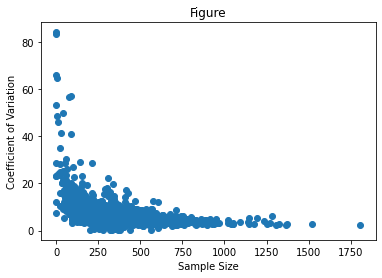

In [ ]:
import matplotlib.pyplot as plt # required for graphs (histogram, boxplot)
# Scatter Plot
acstest2 = acstest.loc[acstest['B00001_001E']<500]
plt.scatter(acstest['B00001_001E'],acstest['B01001_001 Coefficient of Variation'] )
plt.title('Figure')
plt.xlabel('Sample Size')
plt.ylabel('Coefficient of Variation')
plt.show()